### Mean prediction for sample with normal distribution

In [1]:
import numpy as np

# fixing random state for reproducibility
np.random.seed(42)

# mean
mu = 0
# standard deviation
sigma = 1
# sample size
size = 50
# random samples from normal distribution
x = np.random.normal(loc=mu, scale=sigma, size=size)

Text(0,0.5,'Probability Density')

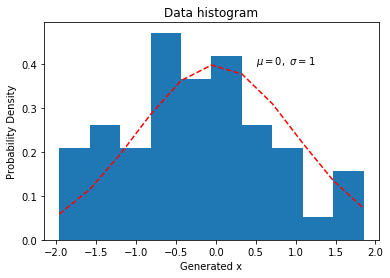

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab
%matplotlib inline

fig, ax = plt.subplots()

# the histogram of the data
# bins - number of edges
bins = 10
# density - the area under the histogram will sum to 1
# n - the values of the histogram bins
# patches - silent list of individual patches used to create the histogram
n, bins, patches = ax.hist(x, bins=bins, density=True)

# add 'best fit' line
ax.plot(bins, norm().pdf(bins), 'r--', label='norm pdf')
plt.title('Data histogram')
plt.text(0.5, 0.4, r'$\mu=0,\ \sigma=1$')
ax.set_xlabel('Generated x')
ax.set_ylabel('Probability Density')

#### Modeling part

In [3]:
import pymc3 as pm

In [4]:
%%time
model = pm.Model()
with model:
    # prior for mean
    mean = pm.Normal('mu', mu=0, sd=0.5)
    # likelihood
    obs = pm.Normal('obs', mu=mean, sd=1, observed=x)

CPU times: user 214 ms, sys: 24.2 ms, total: 238 ms
Wall time: 1.52 s


#### MCMC

In [5]:
%%time
with model:
    # draw samples from the posterior
    # draws - the number of samples to draw
    # tune – number of iterations to tune
    trace = pm.sample(draws=10000, tune=5000, cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]
Sampling 4 chains: 100%|██████████| 60000/60000 [00:21<00:00, 2818.70draws/s]


CPU times: user 14.3 s, sys: 987 ms, total: 15.3 s
Wall time: 23 s


#### Prediction

In [6]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,-0.209217,0.135694,0.000964,-0.469141,0.060166,19074.915356,0.999989


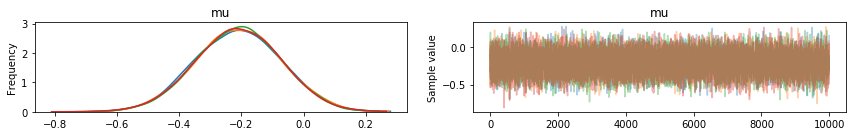

In [7]:
pm.traceplot(trace)
pass

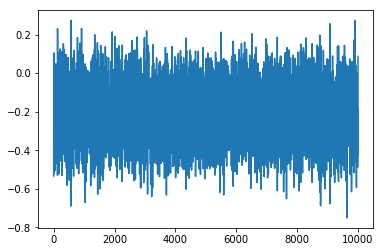

In [8]:
# see how one chain looks like
fig, ax = plt.subplots()
ax.plot(trace.get_values('mu', chains=1))
pass